In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_excel("resources/LR DATA.xlsx")
df.head()

,age,department,employee_number,gender,job_level,marital_status,over_time,performance_rating,totalW_working_years,training_times_last_year,years_since_last_promotion,years_with_curr_manager,monthly_income,salary_2017,salary_2018,year_of_joining,last_role_change
0,41,Sales,1,Female,2,Single,Yes,3,8,0,0,5,5993,71916,79826.76,2012,2014
1,49,Research & Development,2,Male,2,Married,No,4,10,3,1,7,5130,61560,75718.80,2008,2011
2,37,Research & Development,4,Male,1,Single,Yes,3,7,3,0,0,2090,25080,28842.00,2018,2018
3,33,Research & Development,5,Female,1,Married,Yes,3,8,3,3,0,2909,34908,38747.88,2010,2011
4,27,Research & Development,7,Male,1,Married,No,3,6,3,2,2,3468,41616,46609.92,2016,2016


count      1470.000000
mean      89847.609224
std       65024.886276
min       13439.880000
25%       40254.600000
50%       68369.400000
75%      114802.560000
max      295323.360000
Name: salary_2018, dtype: float64


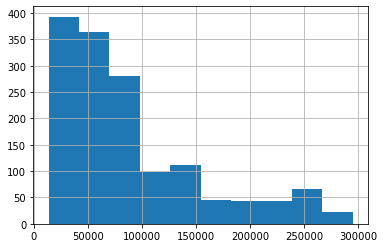

In [3]:
print(df["salary_2018"].describe())
df['salary_2018'].hist()

In [4]:
skew = pd.read_excel("resources/skewness.xlsx")

In [5]:
skew.columns

Index(['manager_sat', 'employee_sat', 'salary_2017', 'percent_salary_hike',
       'age'],
      dtype='object')

1.2416158547092389

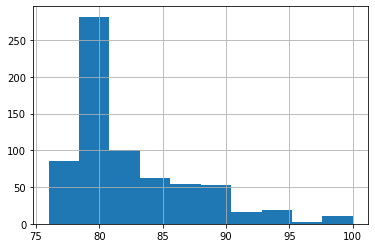

In [6]:
skew["manager_sat"].hist()
skew["manager_sat"].skew()

1.1886925569711662

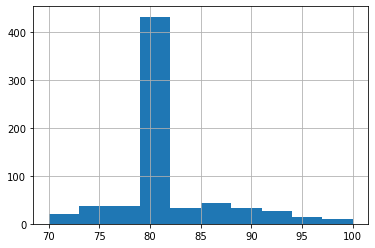

In [7]:
skew["employee_sat"].hist()
skew["employee_sat"].skew()

-3.412260009017281

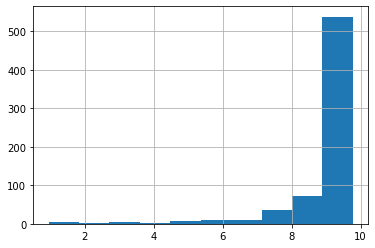

In [8]:
skew["percent_salary_hike"].hist()
skew["percent_salary_hike"].skew()

In [9]:
df_std = pd.read_excel("resources/mean median mode.xlsx")

In [10]:
# Z score 구하기
# Z score 는 평균값을 0 으로 맞춘 후 관측값이 평균값에서 얼마나 떨어져 있는 가를 나타내는 것임
# 통상 아웃라이어를 발라내는 데 사용함. 
# 통상 Z score 가 +- 2.5 를 넘어가면 아웃라이어로 판단.
from sklearn import preprocessing
df_std_std = preprocessing.scale(df_std['salary_2018'])

In [11]:
df_std_std

array([-0.15416035, -0.21735705, -0.93850791, ..., -0.02158076,
       -0.24787267, -0.47163915])

In [12]:
df.describe()

,age,employee_number,job_level,performance_rating,totalW_working_years,training_times_last_year,years_since_last_promotion,years_with_curr_manager,monthly_income,salary_2017,salary_2018,year_of_joining,last_role_change
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,1024.865306,2.063946,3.153741,11.279592,2.799320,2.187755,4.123129,6502.931293,78035.175510,89847.609224,2010.991837,2013.770748
std,9.135373,602.024335,1.106940,0.360824,7.780782,1.289271,3.222430,3.568136,4707.956783,56495.481397,65024.886276,6.126525,3.623137
min,18.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1009.000000,12108.000000,13439.880000,1978.000000,2000.000000
25%,30.000000,491.250000,1.000000,3.000000,6.000000,2.000000,0.000000,2.000000,2911.000000,34932.000000,40254.600000,2009.000000,2011.000000
50%,36.000000,1020.500000,2.000000,3.000000,10.000000,3.000000,1.000000,3.000000,4919.000000,59028.000000,68369.400000,2013.000000,2015.000000
75%,43.000000,1555.750000,3.000000,3.000000,15.000000,3.000000,3.000000,7.000000,8379.000000,100548.000000,114802.560000,2015.000000,2016.000000
max,60.000000,2068.000000,5.000000,4.000000,40.000000,6.000000,15.000000,17.000000,19999.000000,239988.000000,295323.360000,2018.000000,2018.000000


In [13]:
np.quantile(df["salary_2018"],0.75)

114802.56

In [14]:
df["salary_2018"].median()

68369.4

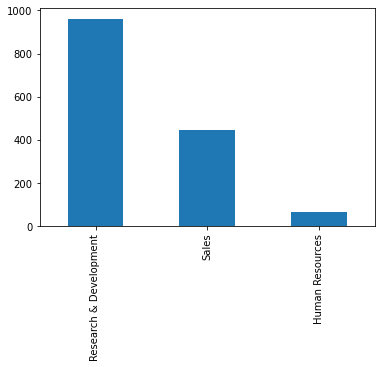

In [15]:
df_std['department'].value_counts().plot(kind="bar")

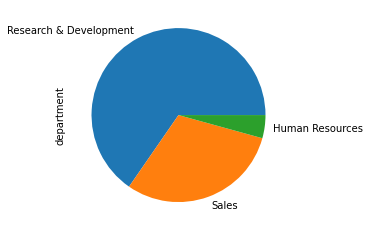

In [16]:
df_std["department"].value_counts(normalize=True).plot(kind="pie")

In [17]:
df_missing = pd.read_excel("resources/missing data.xlsx")

In [18]:
#데이터에서 Missing value 를 찾아서 각 변수 (컬럼) 마다 얼마나 관측값이 없어졌는지 합산하여 보여준다.
df_missing.isna().sum()

e_code                      0
status                      0
hire_date                   0
service_agreement           0
job_level                   0
performance_rating_2018     0
performance_rating_2017     0
year_of_birth               0
gender                      0
distance_from_home          0
manager_changes             0
no_of_promotions            0
risk_of_attrition          14
potential_rating            0
bonus                       0
no_courses_taken            0
time_in_position            0
awards                      0
signon                      0
manager_sat                 0
employee_sat               21
salary_2017                 0
salary_2018                 0
dtype: int64

In [19]:
#결측값의 숫자가 변수를 포기할 정도인지 (30% 이상 결측치이면 변수 포기) 확인한다.
#결측치가 있는 2개의 항목이 각각 2%, 3% 여서 변수를 포기하지 않고 이를 대체한다.
#결측치가 Categorical 이면 mode 값으로, countinous data 이면 주로 평균으로 결측치에 껴 넣어준다.
df_missing.isna().sum()/df_missing.count()*100

e_code                     0.000000
status                     0.000000
hire_date                  0.000000
service_agreement          0.000000
job_level                  0.000000
performance_rating_2018    0.000000
performance_rating_2017    0.000000
year_of_birth              0.000000
gender                     0.000000
distance_from_home         0.000000
manager_changes            0.000000
no_of_promotions           0.000000
risk_of_attrition          2.083333
potential_rating           0.000000
bonus                      0.000000
no_courses_taken           0.000000
time_in_position           0.000000
awards                     0.000000
signon                     0.000000
manager_sat                0.000000
employee_sat               3.157895
salary_2017                0.000000
salary_2018                0.000000
dtype: float64

In [20]:
df_missing["risk_of_attrition"].isna().sum()

14

In [59]:
df_missing["risk_of_attrition"].mode()

0    LOW
dtype: object

In [21]:
#카테고리 데이터에서는 결측치를 mode 깂으로 대체한다.
df_missing_1 = df_missing["risk_of_attrition"].fillna("LOW")

In [22]:
df_missing_1.isna().sum()

0

In [23]:
df_missing["risk_of_attrition"] = df_missing_1

In [24]:
df_missing.isna().sum()

e_code                      0
status                      0
hire_date                   0
service_agreement           0
job_level                   0
performance_rating_2018     0
performance_rating_2017     0
year_of_birth               0
gender                      0
distance_from_home          0
manager_changes             0
no_of_promotions            0
risk_of_attrition           0
potential_rating            0
bonus                       0
no_courses_taken            0
time_in_position            0
awards                      0
signon                      0
manager_sat                 0
employee_sat               21
salary_2017                 0
salary_2018                 0
dtype: int64

In [25]:
df.describe()

,age,employee_number,job_level,performance_rating,totalW_working_years,training_times_last_year,years_since_last_promotion,years_with_curr_manager,monthly_income,salary_2017,salary_2018,year_of_joining,last_role_change
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,1024.865306,2.063946,3.153741,11.279592,2.799320,2.187755,4.123129,6502.931293,78035.175510,89847.609224,2010.991837,2013.770748
std,9.135373,602.024335,1.106940,0.360824,7.780782,1.289271,3.222430,3.568136,4707.956783,56495.481397,65024.886276,6.126525,3.623137
min,18.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1009.000000,12108.000000,13439.880000,1978.000000,2000.000000
25%,30.000000,491.250000,1.000000,3.000000,6.000000,2.000000,0.000000,2.000000,2911.000000,34932.000000,40254.600000,2009.000000,2011.000000
50%,36.000000,1020.500000,2.000000,3.000000,10.000000,3.000000,1.000000,3.000000,4919.000000,59028.000000,68369.400000,2013.000000,2015.000000
75%,43.000000,1555.750000,3.000000,3.000000,15.000000,3.000000,3.000000,7.000000,8379.000000,100548.000000,114802.560000,2015.000000,2016.000000
max,60.000000,2068.000000,5.000000,4.000000,40.000000,6.000000,15.000000,17.000000,19999.000000,239988.000000,295323.360000,2018.000000,2018.000000


In [26]:
df_std.columns

Index(['age', 'department', 'employee_number', 'gender', 'job_level',
       'marital_status', 'over_time', 'performance_rating',
       'totalW_working_years', 'training_times_last_year',
       'years_since_last_promotion', 'years_with_curr_manager',
       'monthly_income', 'salary_2017', 'salary_2018', 'year_of_joining',
       'last_role_change', 'percent_hike'],
      dtype='object')

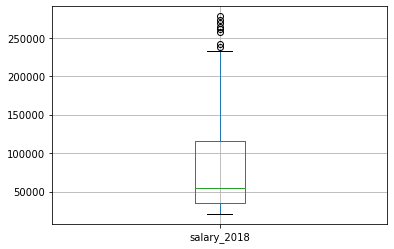

In [27]:
df_std1 = df[df["department"] == "Human Resources"]
df_std1.boxplot(column = "salary_2018")

In [39]:
df_z = pd.read_excel("resources/mean median mode.xlsx")
df_z1 = df[df["department"] == "Sales"]
from scipy import stats
z = stats.zscore(df_z1["salary_2018"])
z[0:3]

array([-0.28896024,  2.1212372 , -0.81666128])

In [29]:
print(z[z > 3])

[3.10840055 3.17732311 3.56073287 3.36539333 3.0920483  3.1318485 ]


In [31]:
print(z[z < -3])

[]


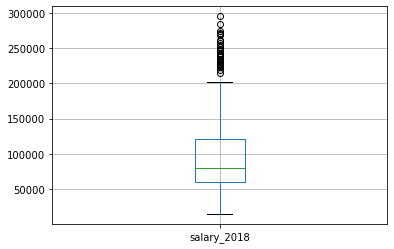

In [53]:
df_z1.boxplot(column="salary_2018")

In [55]:
#아웃라이어를 제거합니다
#아웃라이어를 평균값으로 대체합니다.
df_z2 = df_z1.copy()
df_z2[df_z2["salary_2018"]>200000] = df_z2["salary_2018"].mean()

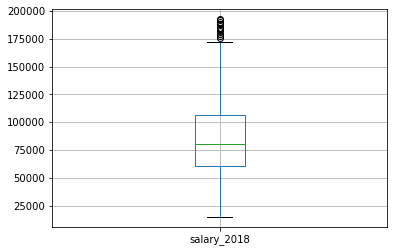

In [56]:
#아웃라이어를 제거하여도 아래와 같이 아웃라이어는 계속 나올 수 있음
df_z2.boxplot(column="salary_2018")

In [57]:
df_z2 = df_z1.copy()
df_z2[df_z2["salary_2018"]>200000] = df_z2["salary_2018"].median()

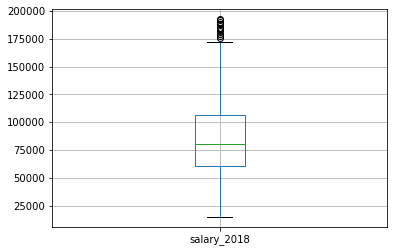

In [58]:
df_z2.boxplot(column="salary_2018")

In [62]:
#아웃라이어 처리방안2 : Capping & Flooring
#flooring : 전체 데이터에서 1%에 이르기까지의 데이터
#Capping : 전체 데이터에서 99% 에 해당하는 데이터
# 1~99% 까지의 데이터만을 사용하는 기법
df_z2 = df_z1.copy()
df_z2["salary_2018"].quantile([0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1])

0.00     14658.36
0.05     31512.48
0.10     36427.80
0.15     41848.35
0.20     57606.12
0.25     60612.03
0.30     64529.76
0.35     68553.87
0.40     72940.32
0.45     75551.19
0.50     80480.64
0.55     85918.56
0.60     91573.92
0.65     98616.45
0.70    110469.48
0.75    121800.96
0.80    131708.28
0.85    141664.71
0.90    176863.92
0.95    230425.35
1.00    295323.36
Name: salary_2018, dtype: float64

In [64]:
#pandas 의 clip method 를 이용하여 데이터를 정제
#clip은 일정 수준 이상의 데이터를 정해진 값으로 Trim 하는 메소드임
df_z2["salary_2018"] = df_z2["salary_2018"].clip(df_z2["salary_2018"].quantile(0),df_z2["salary_2018"].quantile(0.9))

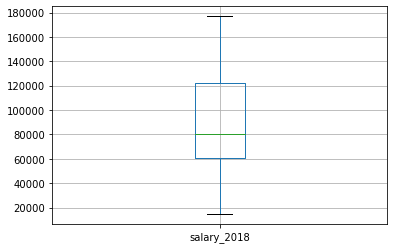

In [66]:
df_z2.boxplot(column="salary_2018")